![](https://corporate.walmart.com/content/corporate/en_us/about/jcr:content/par/grid_4_copy_copy/parsys_tab_1/image.img.jpg/1693432306522.jpg)

In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import datetime
import os

##### Chargement du dataset walmart

In [35]:
df = pd.read_csv("Walmart Sales Data.csv")
df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


In [36]:
print(f"Ligne X Colonne: {df.shape}")
print('-------Les types de colonnes-----------')
print(df.dtypes)
df.describe(include='all')

Ligne X Colonne: (1000, 17)
-------Les types de colonnes-----------
Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
count,1000,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000,1000,1000.00000,1000.000000,1000.000000,1000.00000
unique,1000,3,3,2,2,6,NaN,NaN,NaN,NaN,89,506,3,NaN,NaN,NaN,NaN
top,750-67-8428,A,Yangon,Member,Female,Fashion accessories,NaN,NaN,NaN,NaN,2019-02-07,19:48:00,Ewallet,NaN,NaN,NaN,NaN
freq,1,340,340,501,501,178,NaN,NaN,NaN,NaN,20,7,345,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,55.672130,5.510000,15.379369,322.966749,NaN,NaN,NaN,307.58738,4.761905,15.379369,6.97270
std,NaN,NaN,NaN,NaN,NaN,NaN,26.494628,2.923431,11.708825,245.885335,NaN,NaN,NaN,234.17651,0.000000,11.708825,1.71858
min,NaN,NaN,NaN,NaN,NaN,NaN,10.080000,1.000000,0.508500,10.678500,NaN,NaN,NaN,10.17000,4.761905,0.508500,4.00000
25%,NaN,NaN,NaN,NaN,NaN,NaN,32.875000,3.000000,5.924875,124.422375,NaN,NaN,NaN,118.49750,4.761905,5.924875,5.50000
50%,NaN,NaN,NaN,NaN,NaN,NaN,55.230000,5.000000,12.088000,253.848000,NaN,NaN,NaN,241.76000,4.761905,12.088000,7.00000
75%,NaN,NaN,NaN,NaN,NaN,NaN,77.935000,8.000000,22.445250,471.350250,NaN,NaN,NaN,448.90500,4.761905,22.445250,8.50000


In [37]:
# verifier les valeurs manquantes
valeursmanquantes = df.isnull().sum()/len(df)
print(valeursmanquantes[valeursmanquantes>0])

Series([], dtype: float64)


In [38]:
# changer les type de colonnes
df[['Date']].dtypes

Date    object
dtype: object

In [39]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [40]:
df['Date'].dt.year

0      2019
1      2019
2      2019
3      2019
4      2019
       ... 
995    2019
996    2019
997    2019
998    2019
999    2019
Name: Date, Length: 1000, dtype: int32

In [41]:
# Cette vérification est utile si on veut s'assurer qu'il n'y a pas de doublons dans les identifiants uniques.
print(f'Somme des colonnes dupliques:{df['Invoice ID'].duplicated().sum()}')
# Cette méthode permet de repérer des lignes qui seraient complètement identiques sur toutes les colonnes.
df[df.duplicated()]

Somme des colonnes dupliques:0


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating


In [42]:
df.loc[df['Invoice ID'].duplicated(keep=False), :]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating


In [43]:
# standartisation les colonnes en remplacant les espaces par un underscore
df.columns = df.columns.str.replace(' ', '_')

In [44]:
df[['Unit_price', 'Total', 'Rating']].describe()

,Unit_price,Total,Rating
count,1000.000000,1000.000000,1000.00000
mean,55.672130,322.966749,6.97270
std,26.494628,245.885335,1.71858
min,10.080000,10.678500,4.00000
25%,32.875000,124.422375,5.50000
50%,55.230000,253.848000,7.00000
75%,77.935000,471.350250,8.50000
max,99.960000,1042.650000,10.00000


##### 1. Quels sont les quantites de produit les plus vendus par catégorie ?

Product_line
Electronic accessories    971
Food and beverages        952
Sports and travel         920
Home and lifestyle        911
Fashion accessories       902
Health and beauty         854
Name: Quantity, dtype: int64


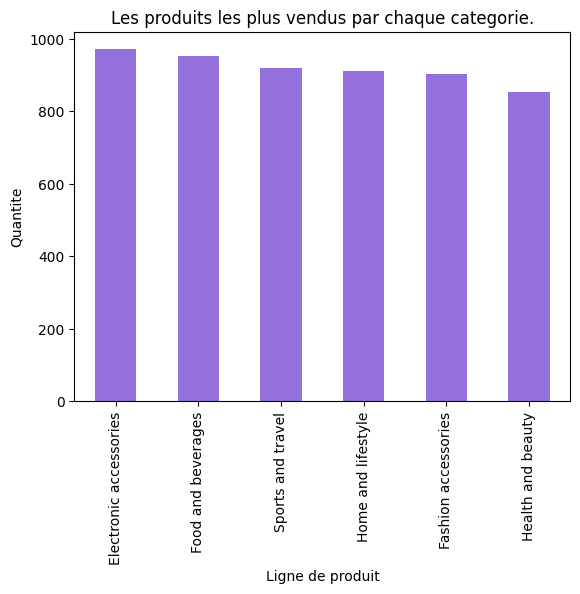

In [45]:
prodvenducateg = df.groupby('Product_line')['Quantity'].sum().sort_values(ascending=False)
print(prodvenducateg)
prodvenducateg.plot(kind='bar', stacked=True, color='mediumpurple', title='Les produits les plus vendus par chaque categorie.')
plt.xlabel('Ligne de produit')
plt.ylabel('Quantite')
plt.show()

##### 2. Moyenne de vente par facture

In [46]:
average_sales_per_invoice = df['Total'].mean()
print(f"La moyenne des ventes totales par facture est : {average_sales_per_invoice:.3f}")

La moyenne des ventes totales par facture est : 322.967


##### ville ou branche qui ont les ventes les plus eleves.

vente par ville:--
City
Naypyitaw    110568.7065
Yangon       106200.3705
Mandalay     106197.6720
Name: Total, dtype: float64


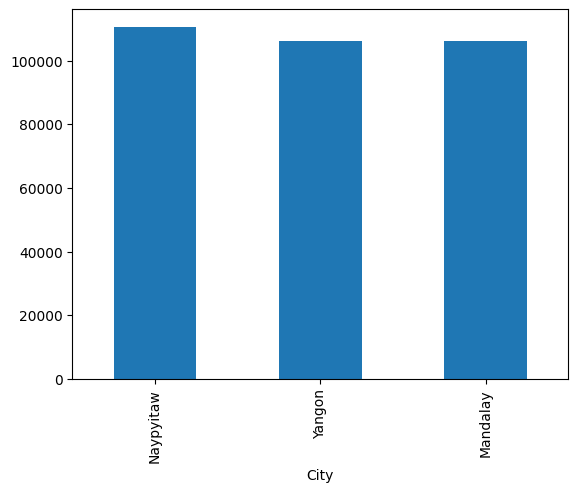

In [47]:
cityeleve = df.groupby('City')['Total'].sum().sort_values(ascending=False)
cityeleve.plot(kind='bar')
print('vente par ville:--')
print(cityeleve)


Branch
C    110568.7065
A    106200.3705
B    106197.6720
Name: Total, dtype: float64


<Axes: xlabel='Branch'>

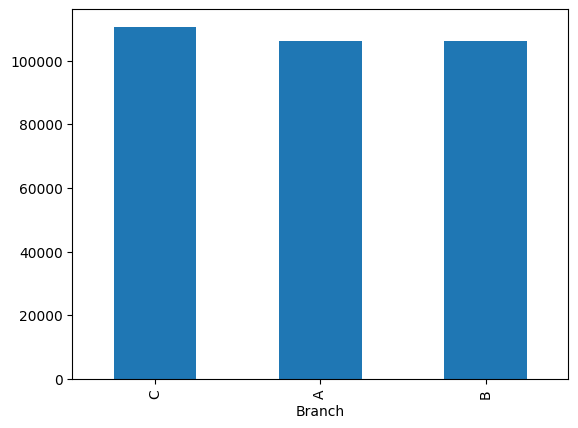

In [48]:
brancheleve = df.groupby('Branch')['Total'].sum().sort_values(ascending=False)
print(brancheleve)
brancheleve.plot(kind='bar')

##### 3. les clients reguliers achetent t-ils en plus grande quantite que le nouveaux clients

Quantité moyenne achetée par type de client :
Customer_type
Member    5.558882
Normal    5.460922
Name: Quantity, dtype: float64


C:\Users\Nelson Beneche\AppData\Local\Temp\ipykernel_8984\2752518552.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.bar(['Client Membre','Client Normal'], [average_quantity_by_customer_type[0], average_quantity_by_customer_type[1]], color=('mediumpurple'), width=0.5)


Text(0.5, 1.0, 'Moyenne par client')

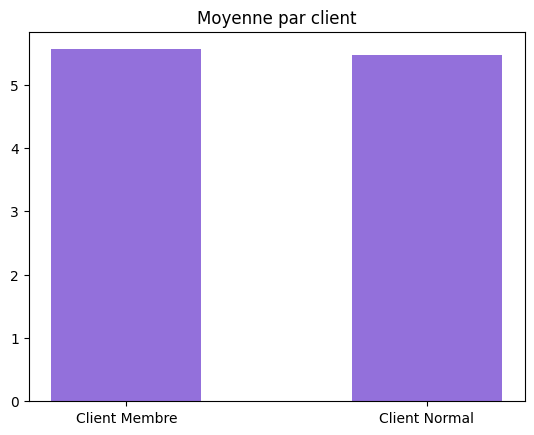

In [49]:
# 1 facon
# clientregulier = df.loc[df['Customer_type'].isin(['Member'])]
# clr = clientregulier['Quantity'].mean()
# print(f'Membre:{clr}')
# # nouveau client
# clientnormal = df.loc[df['Customer_type'].isin(['Normal'])]
# cln = clientnormal['Quantity'].mean()
# print(f'Normal: {cln}')

# 2 facon 
average_quantity_by_customer_type = df.groupby('Customer_type')['Quantity'].mean()
print("Quantité moyenne achetée par type de client :")
print(average_quantity_by_customer_type)
plt.bar(['Client Membre','Client Normal'], [average_quantity_by_customer_type[0], average_quantity_by_customer_type[1]], color=('mediumpurple'), width=0.5)
plt.title('Moyenne par client')

##### 4. quel mode de paiement le plus utilise

In [50]:
df.head(5)

,Invoice_ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax_5%,Total,Date,Time,Payment,cogs,gross_margin_percentage,gross_income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


In [51]:
typepaiement = df['Payment'].unique().tolist()
print(f'Les types de paiements sont: {', '.join(typepaiement)}')
print(f'Mode de paiements utilises: {df['Payment'].value_counts()}')
print(f'Le plus utilise: {df['Payment'].value_counts().idxmax()}')

Les types de paiements sont: Ewallet, Cash, Credit card
Mode de paiements utilises: Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64
Le plus utilise: Ewallet


##### 5. 6.	Y a-t-il une différence notable dans les ventes par genre (masculin vs féminin) ?

Gender
Female    167882.925
Male      155083.824
Name: Total, dtype: float64


C:\Users\Nelson Beneche\AppData\Local\Temp\ipykernel_8984\1378395960.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.bar(['Female','Male'], [genre_male_female[0], genre_male_female[1]])


<BarContainer object of 2 artists>

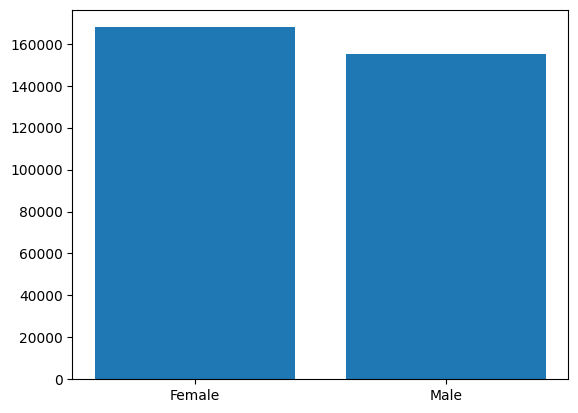

In [52]:
genre_male_female = df.groupby('Gender')['Total'].sum()
print(genre_male_female)
# visualisation
plt.bar(['Female','Male'], [genre_male_female[0], genre_male_female[1]])

##### 7. Quels sont les jours ou les heures de la journée les plus propices aux ventes ?

Jour_
Samedi      56120.8095
Mardi       51482.2455
Jeudi       45349.2480
Dimanche    44457.8925
Vendredi    43926.3405
Mercredi    43731.1350
Lundi       37899.0780
Name: Total, dtype: float64
Heure
19    39699.5130
13    34723.2270
10    31421.4810
15    31179.5085
14    30828.3990
11    30377.3295
12    26065.8825
18    26030.3400
16    25226.3235
17    24445.2180
20    22969.5270
Name: Total, dtype: float64


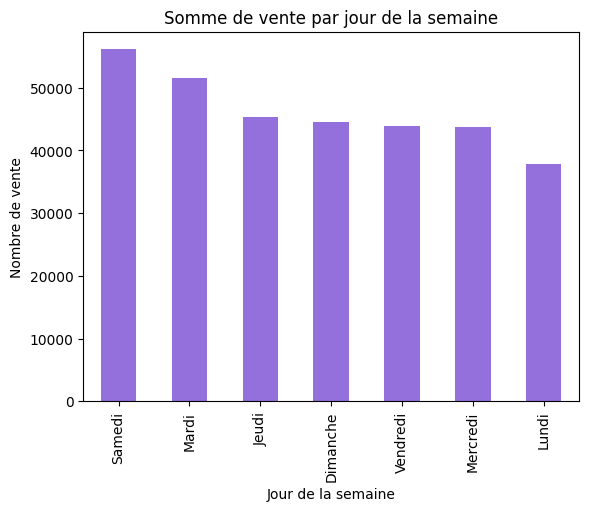

In [53]:
df[['Date','Time']].head(5)
# Recuperer le jour de la semaine dans la colonne (Date)
df['datef'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['Jour_']= df['datef'].dt.day_name(locale='fr_FR')

# df['JourAng']= df['datef'].dt.strftime('%A')
# Recuperer le jour de la colonne Date en francais
# df['Datefrancais'] = df['Date'].apply(lambda x: format_date(x, format="EEEE dd MMMM yyyy", locale="fr_FR"))

# Recuperer l'heure
heure = pd.to_datetime(df['Time'], format='%H:%M:%S')
df['Heure'] = heure.dt.hour
# Regroupement de donnees
print(df.groupby('Jour_')['Total'].sum().sort_values(ascending=False))
print(df.groupby('Heure')['Total'].sum().sort_values(ascending=False))
histog_jour = df.groupby('Jour_')['Total'].sum().sort_values(ascending=False)
df[['Jour_','Heure','Time','Date','datef']]
histog_jour = histog_jour.plot(kind='bar', color='mediumpurple', title='Somme de vente par jour de la semaine')
plt.xlabel('Jour de la semaine')
plt.ylabel('Nombre de vente')
plt.show()

##### 8.	Les produits ont-ils des marges bénéficiaires similaires, ou y a-t-il des variations importantes ? 
1.	Comparaison des revenus bruts par catégorie de produit : Identifier les produits générant le plus de revenus bruts.
2.	Analyse des quantités vendues : Voir si certaines catégories ont des ventes plus élevées en termes de quantité.
3.	Analyse des prix unitaires moyens : Comprendre si les produits ont des prix similaires ou des écarts significatifs.
4.	Performance par ville ou succursale : Étudier les performances régionales.
5.	Répartition des types de paiement : Identifier les préférences de paiement des clients par catégorie de produit.


In [54]:
# 1 Revenu brut total par ligne de produit
revenu_ligne_produit = df.groupby('Product_line')['gross_income'].sum().sort_values(ascending=False)
round(revenu_ligne_produit, 2)

Product_line
Food and beverages        2673.56
Sports and travel         2624.90
Electronic accessories    2587.50
Fashion accessories       2586.00
Home and lifestyle        2564.85
Health and beauty         2342.56
Name: gross_income, dtype: float64

In [55]:
# 2. Analyse des quantites vendues(ventes les plus eleves en termes de quantite)
quantitevendu = df.groupby('Product_line')['Quantity'].sum().sort_values(ascending=False)
quantitevendu

Product_line
Electronic accessories    971
Food and beverages        952
Sports and travel         920
Home and lifestyle        911
Fashion accessories       902
Health and beauty         854
Name: Quantity, dtype: int64

In [56]:
# 3. Analyse des prix unitaire moyens
prixunitairesmoyens = df.groupby('Product_line')['Unit_price'].mean().sort_values(ascending=False)
prixunitairesmoyens

Product_line
Fashion accessories       57.153652
Sports and travel         56.993253
Food and beverages        56.008851
Home and lifestyle        55.316937
Health and beauty         54.854474
Electronic accessories    53.551588
Name: Unit_price, dtype: float64

In [57]:
# 4. Revenu brut total par ville
revenue_parville = df.groupby('City')['gross_income'].sum().sort_values(ascending=False)
revenue_parville

City
Naypyitaw    5265.1765
Yangon       5057.1605
Mandalay     5057.0320
Name: gross_income, dtype: float64

In [58]:
# 5. Repartition des differentes types de paiements(identifier les preferences de paiements par categories)
repartitiontype_paiement = df.groupby(['Product_line','Payment']).size().unstack().fillna(0)
repartitiontype_paiement

Payment,Cash,Credit card,Ewallet
Product_line,,,
Electronic accessories,71,46,53
Fashion accessories,57,56,65
Food and beverages,57,61,56
Health and beauty,49,50,53
Home and lifestyle,51,45,64
Sports and travel,59,53,54


In [59]:
# calcul le montant(prix unitaire* quantite)
df['res'] = df.loc[0:5, 'Unit_price'].astype(float) * df.loc[0:5, 'Quantity'].astype(int)

In [60]:
df['res']

0      522.83
1       76.40
2      324.31
3      465.76
4      604.17
        ...  
995       NaN
996       NaN
997       NaN
998       NaN
999       NaN
Name: res, Length: 1000, dtype: float64

In [61]:
df.iloc[0:5, 0:9]

,Invoice_ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax_5%
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085


In [62]:
df[['cogs','gross_margin_percentage','Rating','gross_income','Payment']]

,cogs,gross_margin_percentage,Rating,gross_income,Payment
0,522.83,4.761905,9.1,26.1415,Ewallet
1,76.40,4.761905,9.6,3.8200,Cash
2,324.31,4.761905,7.4,16.2155,Credit card
3,465.76,4.761905,8.4,23.2880,Ewallet
4,604.17,4.761905,5.3,30.2085,Ewallet
...,...,...,...,...,...
995,40.35,4.761905,6.2,2.0175,Ewallet
996,973.80,4.761905,4.4,48.6900,Ewallet
997,31.84,4.761905,7.7,1.5920,Cash
998,65.82,4.761905,4.1,3.2910,Cash


##### 9.	Les clients ayant un certain score de satisfaction (Rating) tendent-ils à acheter des produits spécifiques ? 

Text(0, 0.5, 'Nombre total')

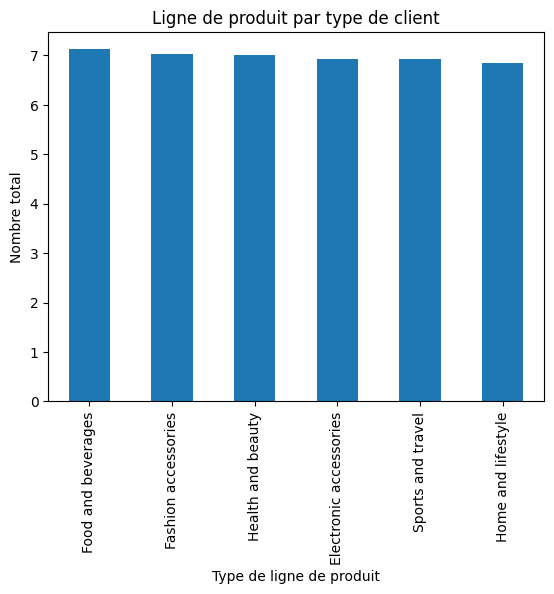

In [63]:
typeprod_rating = df.groupby('Product_line')['Rating'].mean().sort_values(ascending=False)
# plt.figure(figsize=(10, 6))
# sns.boxplot(data=df, x='Product_line', y='Rating', palette='Set3')
# plt.title('Distribution des scores de satisfaction par catégorie de produit')
# plt.xticks(rotation=45)
# plt.show()
typeprod_rating.plot(kind='bar', title='Ligne de produit par type de client')
plt.xlabel('Type de ligne de produit')
plt.ylabel('Nombre total')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, '(Fashion accessories, Naypyitaw)'),
  Text(1, 0, '(Sports and travel, Yangon)'),
  Text(2, 0, '(Food and beverages, Yangon)'),
  Text(3, 0, '(Electronic accessories, Mandalay)'),
  Text(4, 0, '(Health and beauty, Mandalay)'),
  Text(5, 0, '(Food and beverages, Naypyitaw)'),
  Text(6, 0, '(Home and lifestyle, Naypyitaw)'),
  Text(7, 0, '(Sports and travel, Naypyitaw)'),
  Text(8, 0, '(Health and beauty, Naypyitaw)'),
  Text(9, 0, '(Food and beverages, Mandalay)'),
  Text(10, 0, '(Home and lifestyle, Yangon)'),
  Text(11, 0, '(Electronic accessories, Yangon)'),
  Text(12, 0, '(Health and beauty, Yangon)'),
  Text(13, 0, '(Fashion accessories, Yangon)'),
  Text(14, 0, '(Electronic accessories, Naypyitaw)'),
  Text(15, 0, '(Fashion accessories, Mandalay)'),
  Text(16, 0, '(Home and lifestyle, Mandalay)'),
  Text(17, 0, '(Sports and travel, Mandalay)')])

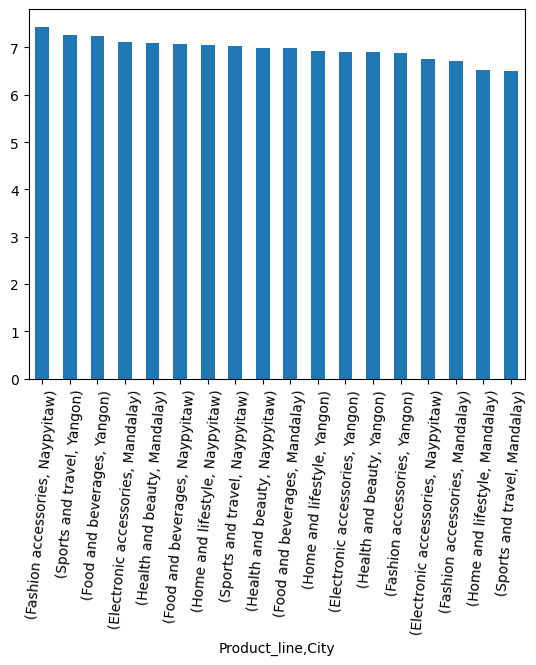

In [64]:
# moyenne de produit vendus par ville
typeprodrating_ville = df.groupby(['Product_line','City'])['Rating'].mean().sort_values(ascending=False)
typeprodrating_ville.plot(kind='bar')
plt.xticks(rotation=85)

##### 10.	Les variations de prix unitaire influencent-elles les quantités vendues ? 

Pour analyser si les variations de prix unitaire influencent les quantités vendues, voici l'approche analytique que nous allons suivre :
1. Relation entre prix unitaire et quantités vendues
Nous examinerons si les produits avec un prix unitaire élevé ont tendance à être vendus en plus petite quantité et inversement. Cela peut être fait en calculant la corrélation entre ces deux variables.

##### NB
Si la corrélation est négative, cela suggère que les produits chers sont vendus en plus petites quantités.
Une corrélation proche de zéro indique peu ou pas de lien entre le prix et les quantités vendues.
Les différences entre catégories pourraient indiquer des comportements d'achat spécifiques.

Corrélation entre le prix unitaire et les quantités vendues : 0.01
 il ny'a pas de lien entre le prix et les quantites vendues.


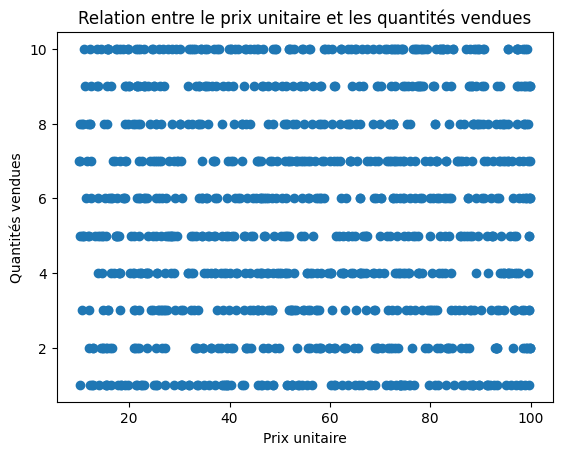

In [70]:
correlation = df['Unit_price'].corr(df['Quantity'])
print(f"Corrélation entre le prix unitaire et les quantités vendues : {correlation:.2f}\n il ny'a pas de lien entre le prix et les quantites vendues.")
# Nuage de points pour visualiser la relation
# plt.figure(figsize=(8, 6))
# sns.scatterplot(data=df, x='Unit_price', y='Quantity', alpha=0.6)
plt.scatter(df['Unit_price'], df['Quantity'])
plt.title('Relation entre le prix unitaire et les quantités vendues')
plt.xlabel('Prix unitaire')
plt.ylabel('Quantités vendues')
plt.show()

In [66]:
##### Analyse par categorie de produit